<a href="https://colab.research.google.com/github/axieax/csc311/blob/main/csc311_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Decision Trees

Let's construct and fit a simple decision tree on 2-dimensional data. Each sample has one of four possible labels, denoted by a different color in the visualization below.

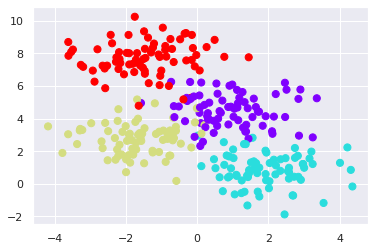

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

We use the `DecisionTreeClassifier` from Scikit-Learn to fit this data and visualize its predictions.

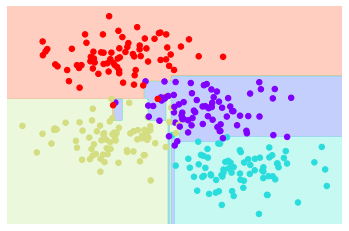

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy').fit(X, y)

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    # code adapted from this handbook: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook
    
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, # clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

visualize_classifier(tree, X, y)

# Random Forests through Bagging

Recall the tecnique of Bagging, using which we create an ensemble of Decision Trees (called Random Forest) to reduce overfitting.

Below, we create a Random Forest of 100 Decision Tree estimators, where 80% of the data is randomly sampled with replacement to fit each estimator.

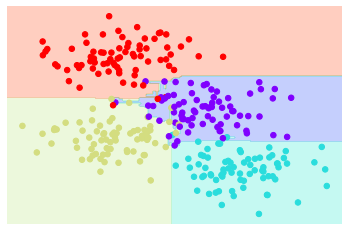

In [ ]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(criterion='entropy')
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)

bag.fit(X, y)
visualize_classifier(bag, X, y)

# Bagging reduces Variance

We saw in lecture that bagging reduces variance. Let's check this empirically.

Below, we perform bagging with different number of estimators and compute the empirical variance in their predictions.

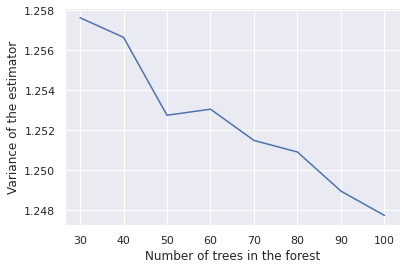

In [ ]:
ns = np.arange(30, 101, step=10)
variance = []
for n in ns:
  tree = DecisionTreeClassifier(criterion='entropy')
  bag = BaggingClassifier(tree, n_estimators=n, max_samples=0.8,
                          random_state=1)
  bag.fit(X, y)

  predictions = []
  for tr in bag.estimators_:
    predictions.append(tr.predict(X))
  predictions = np.array(predictions)
  var = np.var(predictions, axis=1)
  variance.append(np.mean(var))

plt.figure()
plt.plot(ns, variance)
plt.xlabel("Number of trees in the forest")
plt.ylabel("Variance of the estimator")
plt.show()

As expected, variance reduces as we increase the number of estimators!